In [126]:
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline
from sklearn.linear_model import LinearRegression,Ridge,Lasso
from sklearn.neighbors import KNeighborsRegressor
import sklearn.datasets as datasets
from sklearn.model_selection import train_test_split 
import seaborn as sns

In [6]:
faces=datasets.fetch_olivetti_faces()

In [11]:
data=faces["images"]
data.shape

(400, 64, 64)

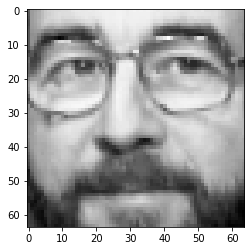

In [40]:
data.reshape(400,-1)
index=np.random.randint(400,size=1)[0]

plt.imshow(data[index],cmap=plt.cm.gray)

In [54]:
# 上半张人脸 
X=data[:,:32].reshape(400,-1)
# 下半张人脸
y=data[:,32:].reshape(400,-1)


In [55]:
x_train,x_test,y_train,y_test=train_test_split(X,y,test_size=10)

In [56]:
x_train.shape

(390, 2048)

In [58]:
x_test.shape

(10, 2048)

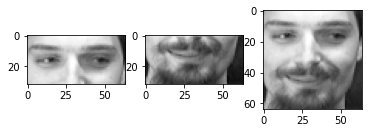

In [106]:
index=np.random.randint(390,size=1)[0]
face_up=x_train[index].reshape(32,64)
face_down=y_train[index].reshape(32,64)

# plt.figure(figsize=())
ax=plt.subplot(1,3,1)
ax.imshow(face_up,cmap="gray")

ax=plt.subplot(1,3,2)
ax.imshow(face_down,cmap="gray")

ax=plt.subplot(1,3,3)
ax.imshow(np.concatenate([face_up,face_down],axis=0),cmap="gray")

In [119]:
estimators={}

estimators["KNN"]=KNeighborsRegressor(n_neighbors=4)
estimators["LR"]=LinearRegression()
estimators["Ridge"]=Ridge(alpha=1)
estimators["Lasso"]=Lasso(alpha=1)




In [120]:
predict_={}
for key,model in estimators.items():
    model.fit(x_train,y_train)
    
    y_=model.predict(x_test)
    predict_[key]=y_
    
    

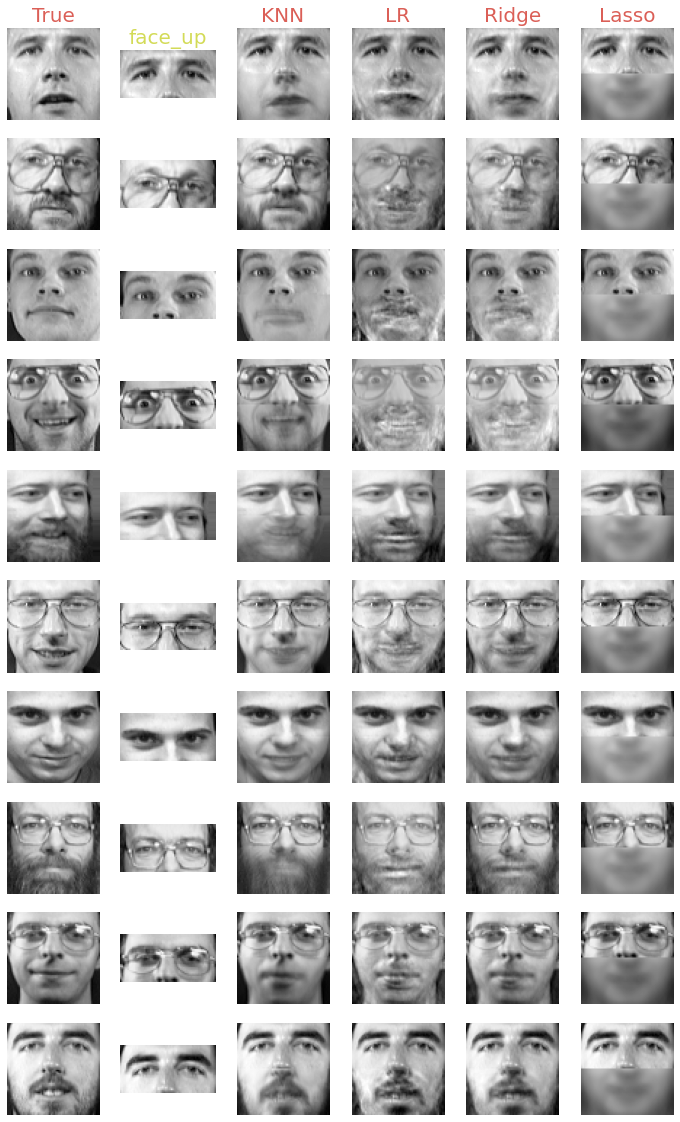

In [131]:
# 可视化 10行6 列
plt.figure(figsize=(6*2,10*2))
colors=sns.color_palette("hls",6)

for i in range(10):
    ax=plt.subplot(10,6,6*i+1) 
    face_up=x_test[i].reshape(32,64)
    face_down=y_test[i].reshape(32,64)
    ax.imshow(np.concatenate([face_up,face_down],axis=0),cmap="gray")
    ax.axis("off")
    if i==0:
        ax.set_title("True",fontdict={'color':colors[0],'fontsize':20})
    ax=plt.subplot(10,6,6*i+2) 
    ax.imshow(face_up,cmap="gray")
    ax.axis("off")
    if i==0:
        ax.set_title("face_up",fontdict={'color':colors[1],'fontsize':20})
        
    for j,key in enumerate(predict_):
        ax=plt.subplot(10,6,6*i+3+j) 
        y_=predict_[key]
        face_down=y_[i].reshape(32,64)
        ax.imshow(np.concatenate([face_up,face_down],axis=0),cmap="gray")
        ax.axis("off")
        if i==0:
            ax.set_title(key,fontdict={'color':colors[i],'fontsize':20})
        
    


    
        
